In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
'''
Выводим функцию для рассчета количества наблюдений
'''

In [3]:
def get_size(p0, pa, alpha, beta):
    za = stats.norm.ppf(1 - alpha)
    zb = stats.norm.ppf(1 - beta)
    n = za * np.sqrt(p0*(1 - p0)) + zb * np.sqrt(pa*(1 - pa))
    n /= (pa - p0)
    return int(np.ceil(n*n))
 
alpha = 0.05
beta = 0.05
 
get_size(0.1, 0.15, alpha, beta)

468

In [4]:
n_0, n_a = 468, 468
p_0, p_a = 0.1, 0.15

# Дисперсии
var_0, var_a = p_0 * (1 - p_0), p_a * (1 - p_a)

# Стандартизованный размер эффекта
(p_a - p_0) / ((n_0 * np.sqrt(var_0) + n_a * np.sqrt(var_a)) / (n_0 + n_a))

0.1521904571390466

In [5]:
# Из statsmodels подгружаем функцию
from statsmodels.stats.power import zt_ind_solve_power
 
alpha = 0.05
beta = 0.05
 
# параметр ratio отвечает за то, в какой выборке больше наблюдений
# nobs1=None неизвестное количество наблюдений. В итоге его получаем
sample_size = zt_ind_solve_power(
    effect_size=0.15219,
    nobs1=None,
    alpha=alpha,
    power=(1 - beta),
    ratio=1,
    alternative='larger'
)
 
print(sample_size/2)

467.2424266951237


In [ ]:
'''
Или получанем мощность теста при 100 наблюдениях (nobs1=100)
'''

In [9]:
zt_ind_solve_power(
    effect_size=0.15219,
    nobs1=100,
    alpha=alpha,
    power=None,
    ratio=1,
    alternative='larger')

0.2847772211312768

In [10]:
# Или effect_size=None.Получаем его значение.
zt_ind_solve_power(
    effect_size=None,
    nobs1=2*467,
    alpha=alpha,
    power=1-beta,
    ratio=1,
    alternative='larger')

0.1522295561785361

In [ ]:
'''
Метод для Т-теста
'''

In [13]:
from statsmodels.stats.power import TTestIndPower
 
effect = 0.5
alpha = 0.05
power = 0.95
 
analysis = TTestIndPower()
analysis.solve_power(effect, power=power, nobs1=None, alpha=alpha, ratio=1)

104.92794663444455

In [ ]:
'''
Построение кривых мощностей.
'''

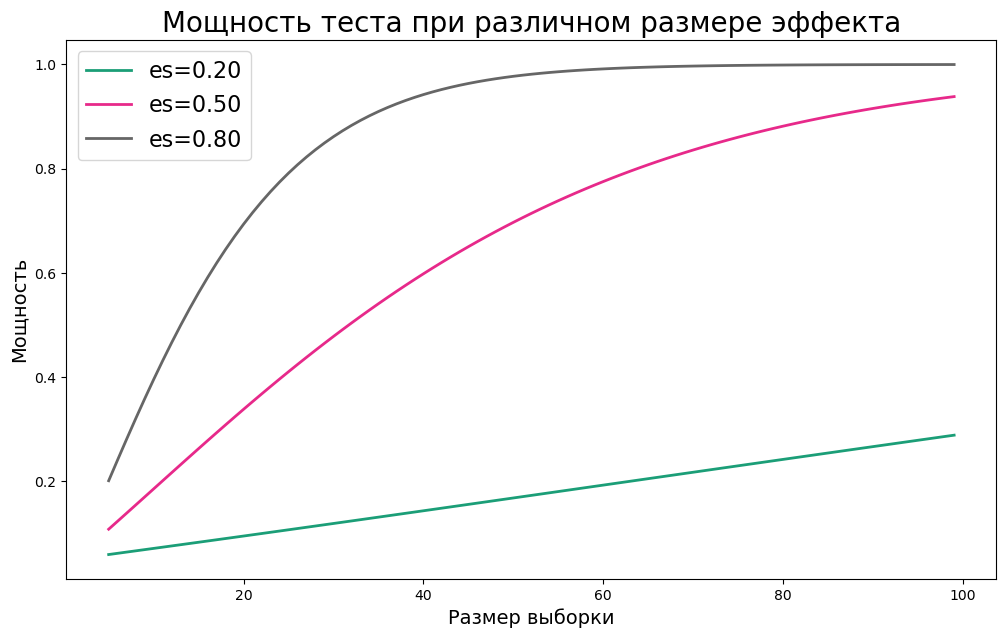

In [14]:

effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
 
analysis = TTestIndPower()
 
_, axes = plt.subplots(1, 1, figsize=(12,7))
 
analysis.plot_power(
    dep_var='nobs',
    nobs=sample_sizes,
    effect_size=effect_sizes,
    ax=axes
)
 
axes.set_title("Мощность теста при различном размере эффекта", fontsize=20)
axes.set_xlabel("Размер выборки", fontsize=14)
axes.set_ylabel("Мощность", fontsize=14)
plt.legend(fontsize=16)